In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn import metrics
from IPython import display
from tensorflow.python.data import Dataset
import math
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.Age.isnull().value_counts()
df['Agenull'] = np.where(df.Age.isnull(), 1, 0)
gender = {'male': 1,'female': 2} 
Gender = [gender[item] for item in df.Sex]
df['Gender'] = Gender
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenull,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,2


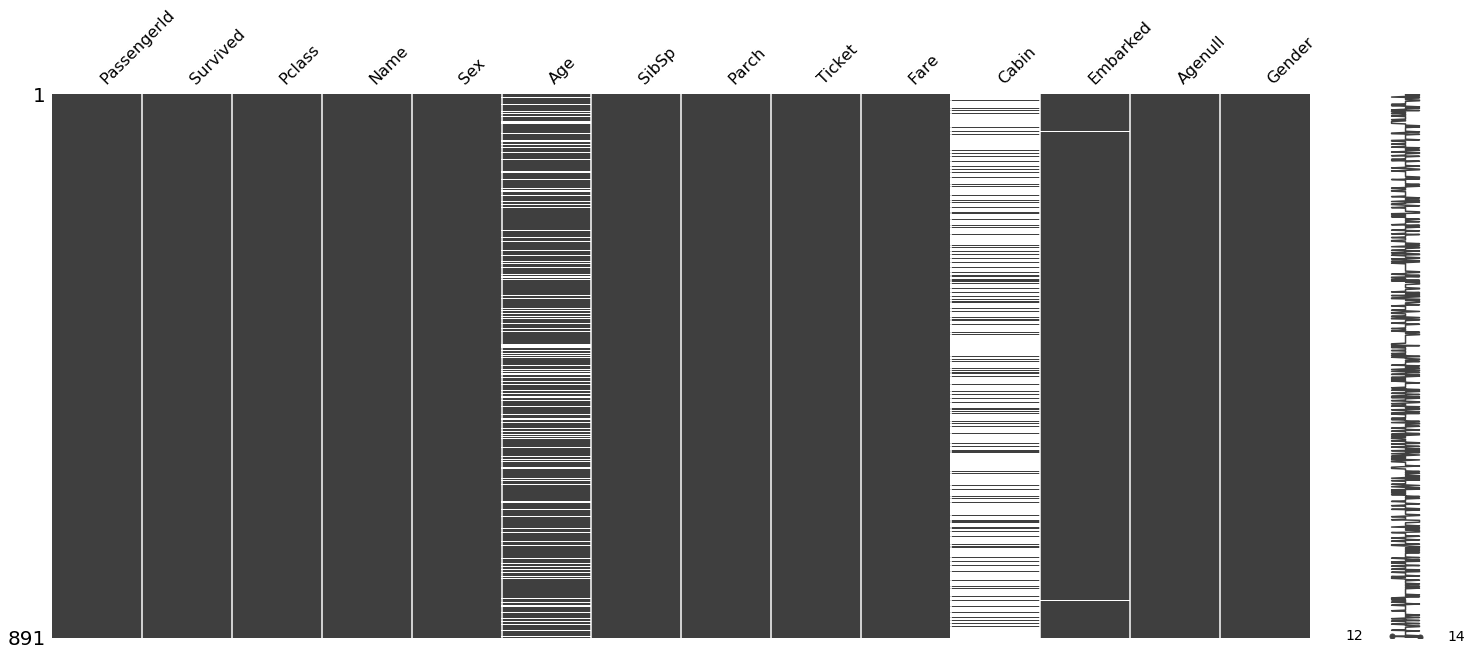

In [5]:
#df.isnull().plot.hist()
msno.matrix(df)

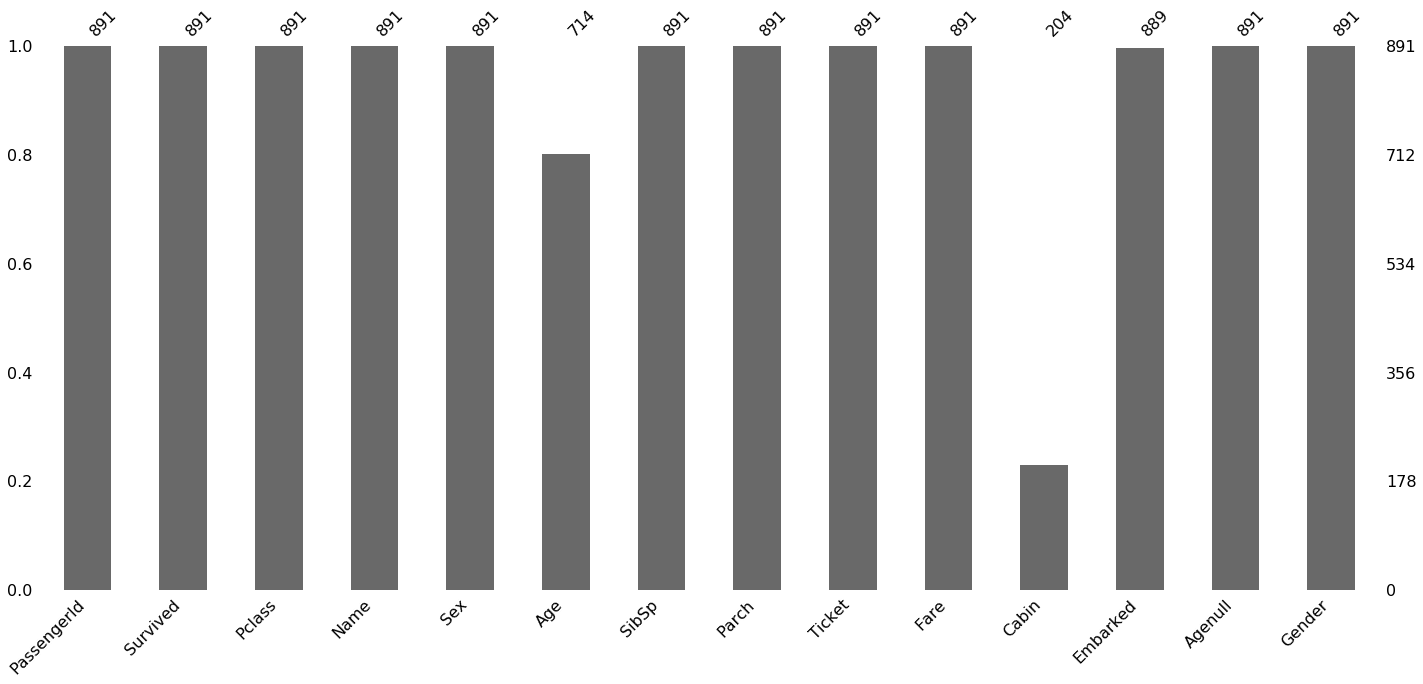

In [6]:
msno.bar(df)

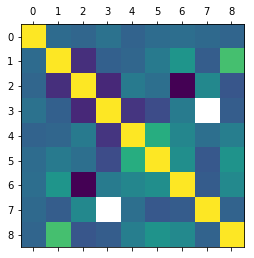

In [7]:
plt.matshow(df.corr())

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Agenull,Gender
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.020167,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.092197,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.172933,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.018958,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.124104,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.100707,0.182333
Agenull,-0.020167,-0.092197,0.172933,NaN,0.018958,-0.124104,-0.100707,1.000000,-0.055215
Gender,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,-0.055215,1.000000


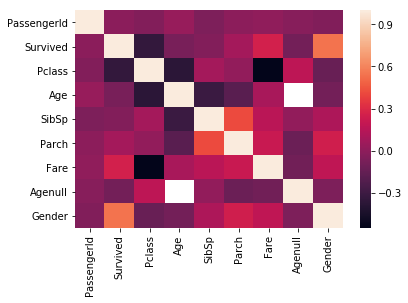

In [9]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenull,Gender
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S,0,1
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S,0,1
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S,0,1
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S,0,1
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S,0,1
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,0,2
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S,1,1
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q,1,1
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,0,2
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q,1,2


In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Agenull,Gender
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.198653,1.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.399210,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


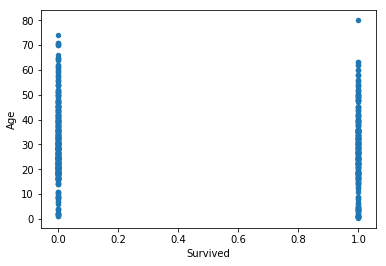

In [12]:
df.plot.scatter(x='Survived', y='Age')

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

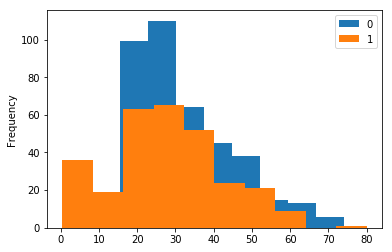

In [13]:
survived = df.groupby('Survived')
survived.Age.plot.hist(legend=True)

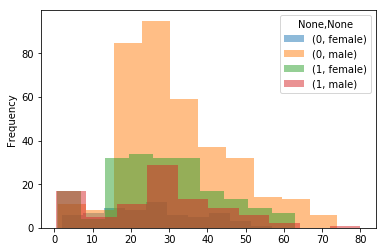

In [14]:
survived = df.groupby(['Survived', 'Sex'])
#female = df.Sex.loc('female' == True)
sur = survived.Age.plot.hist(legend=True, alpha = .5), #fc=(0, 0, 1, .5))

Embarked
C    AxesSubplot(0.125,0.125;0.775x0.755)
Q    AxesSubplot(0.125,0.125;0.775x0.755)
S    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

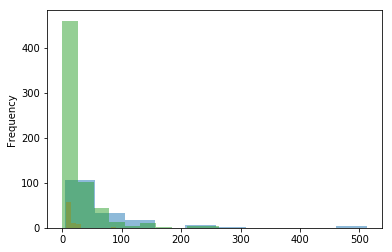

In [16]:
df.groupby('Embarked')['Fare'].plot.hist(alpha=0.5)

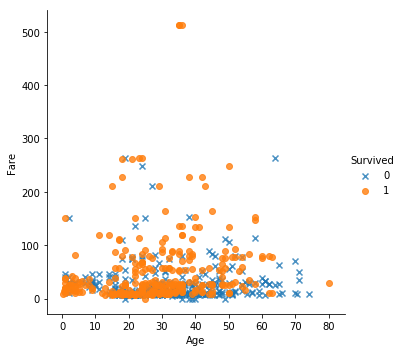

In [17]:
sns.lmplot(x='Age', y='Fare', hue='Survived',
           markers=['x', 'o'],
           fit_reg=False, data=df)

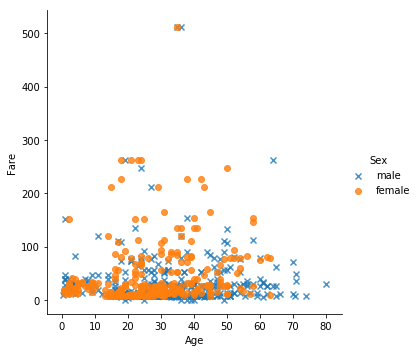

In [18]:
sns.lmplot(x='Age', y='Fare', hue='Sex',
           markers=['x', 'o'],
           fit_reg=False, data=df)

In [19]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

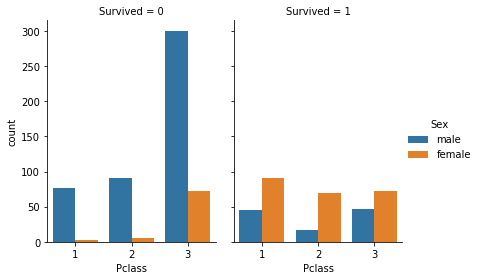

In [20]:
>>> g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
...                 data=df, kind="count",
...                 height=4, aspect=.7);

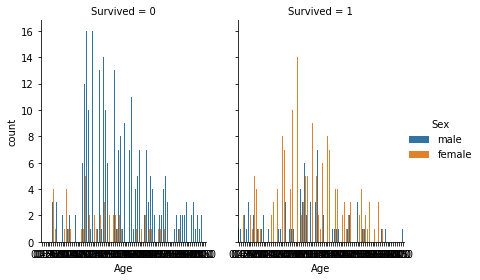

In [21]:
>>> g = sns.catplot(x="Age", hue="Sex", col="Survived",
...                 data=df, kind="count",
...                 height=4, aspect=.7);

In [22]:
df_rand = df.reindex(np.random.permutation(df.index))
print(type(df_rand["Survived"]))

<class 'pandas.core.series.Series'>


In [23]:
def preprocess_features(df_rand):
    df_rand['Agenull'] = np.where(df_rand.Age.isnull(), 1, 0)
    gender = {'male': 1,'female': 2} 
    Gender = [gender[item] for item in df_rand.Sex]
    selected_features = df_rand[['Pclass', 'Age','Agenull']].copy()
    selected_features['Gender'] = Gender
    processed_features = []
    processed_features = selected_features
    return processed_features

In [24]:
def preprocess_targets(df_rand):
    output_targets = pd.DataFrame()
    output_targets = df_rand[["Survived"]]
    return output_targets

In [25]:
# Choose the first 624 examples for training.
training_examples = preprocess_features(df_rand.head(624))
training_targets = preprocess_targets(df_rand.head(624))

# Choose the last 297 examples for validation.
validation_examples = preprocess_features(df_rand.tail(297))
validation_targets = preprocess_targets(df_rand.tail(297))

print("training examples summary")
display.display(training_examples.describe())
print("training targets summary")
display.display(training_targets.describe())
print("validation examples summary")
display.display(validation_examples.describe())
print("validation targets summary")
display.display(validation_targets.describe())

training examples summary


/home/jcruzycelis/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Age,Agenull,Gender
count,624.000000,493.000000,624.000000,624.000000
mean,2.310897,29.762677,0.209936,1.370192
std,0.834341,14.369654,0.407589,0.483243
min,1.000000,0.750000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,1.000000
75%,3.000000,38.000000,0.000000,2.000000
max,3.000000,71.000000,1.000000,2.000000


training targets summary


,Survived
count,624.000000
mean,0.394231
std,0.489077
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


validation examples summary


,Pclass,Age,Agenull,Gender
count,297.000000,244.000000,297.000000,297.000000
mean,2.309764,29.750697,0.178451,1.309764
std,0.837269,14.538124,0.383538,0.463177
min,1.000000,0.420000,0.000000,1.000000
25%,2.000000,20.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,1.000000
75%,3.000000,39.000000,0.000000,2.000000
max,3.000000,80.000000,1.000000,2.000000


validation targets summary


,Survived
count,297.000000
mean,0.363636
std,0.481858
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [26]:
def construct_feature_columns_sex_class():
    '''
    Sex and Pclass
    input_features == the names/keys of the columns to use
    return a set of feature columns
    '''
    Pclass_column = tf.feature_column.numeric_column(key="Pclass")
    Sex_column = tf.feature_column.numeric_column(key='Gender')
    #Get the sex categorical column
    feature_columns = set([
        Pclass_column,
        Sex_column
    ])
    return feature_columns

In [27]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    #This is done to feed into the function an iterator function that will get the batches ready to be processed
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [28]:
def train_linear_classifier_model(
    features_cl,
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    periods = 10                            #Periods are only an indicator for..? Why 10 periods???
    steps_per_period = steps / periods
    #Create a linear regressor object.
    
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)  #This only decreases learning rate as
                                                                                 #as we reduce our loss
    #my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)  #This prevents exploding gradients
    linear_classifier = tf.estimator.LinearClassifier(                             #Here is where the magic happens?
                                                                                #Not really we just created the object
      feature_columns=features_cl,                
      optimizer=my_optimizer,
     # model_dir='/home/jcruzycelis/gender_class_est'
    )
    # Create input functions.                                    
    #WHY DO WE NEED input fn?? why do we need a tuple of features and labels for next data batch?
    training_input_fn = lambda: my_input_fn(training_examples,   
                                          training_targets["Survived"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["Survived"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["Survived"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
    
    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("Logloss (on training data):")
    training_log_losses = []                         #Create an array for the RMSE for what ...??
    validation_log_losses = []                       #Create an array for validation RMSE for what ...??

    for period in range (0, periods):          #Here is where we need the PERIOD, but why?
    # Train the model, starting from the prior state.
    
        linear_classifier.train(
            input_fn=training_input_fn,         #Our linear classifier, which is a tf.estimator.LinearClassifier 
                                                #with its function train
            steps=steps_per_period              #We pass here the steps, but these are steps divided by amount of periods
        )
    
        # Take a break and compute predictions.    
        training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
        validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_log_loss))
        # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
    print("Model training finished.")
  # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()
    return linear_classifier

In [42]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["Survived"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

Training model...
Logloss (on training data):
  period 00 : 0.60
  period 01 : 0.56
  period 02 : 0.54
  period 03 : 0.53
  period 04 : 0.52
  period 05 : 0.51
  period 06 : 0.50
  period 07 : 0.50
  period 08 : 0.50
  period 09 : 0.50
Model training finished.
{'label/mean': 0.36363637, 'precision': 0.75789475, 'accuracy': 0.8013468, 'auc_precision_recall': 0.8306339, 'global_step': 7000, 'average_loss': 0.45499998, 'accuracy_baseline': 0.6363636, 'loss': 0.45499998, 'auc': 0.845581, 'recall': 0.6666667, 'prediction/mean': 0.389188}


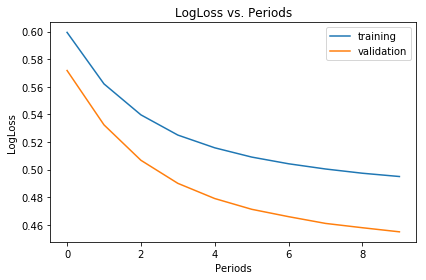

In [43]:
linear_classifier = train_linear_classifier_model(
    features_cl = construct_feature_columns_sex_class(),
    learning_rate = 0.00005,
    steps = 7000,
    batch_size = 100,
    training_examples = training_examples,
    training_targets = training_targets,
    validation_examples = validation_examples,
    validation_targets = validation_targets)
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)
print(evaluation_metrics)

In [54]:
def construct_feature_columns_sex():
    '''
    Only Sex
    input_features == the names/keys of the columns to use
    return a set of feature columns
    '''
    Sex_column = tf.feature_column.numeric_column(key='Gender')
    feature_columns = set([
        Sex_column
    ])
    return feature_columns

Training model...
Logloss (on training data):
  period 00 : 0.58
  period 01 : 0.54
  period 02 : 0.53
  period 03 : 0.52
  period 04 : 0.51
  period 05 : 0.51
  period 06 : 0.51
  period 07 : 0.51
  period 08 : 0.51
  period 09 : 0.51
Model training finished.
{'auc': 0.7440477, 'average_loss': 0.52691936, 'label/mean': 0.36363637, 'recall': 0.6203704, 'global_step': 75000, 'prediction/mean': 0.36245736, 'auc_precision_recall': 0.74333924, 'accuracy_baseline': 0.6363636, 'precision': 0.7282609, 'accuracy': 0.7777778, 'loss': 0.52691936}


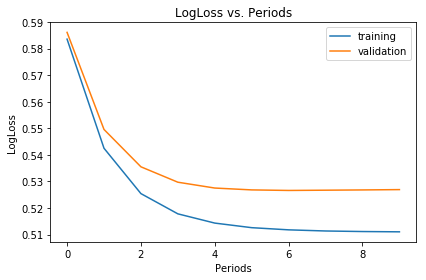

In [57]:
linear_classifier = train_linear_classifier_model(
    features_cl = construct_feature_columns_sex(),
    learning_rate = 0.00005,
    steps = 75000,
    batch_size = 75,
    training_examples = training_examples,
    training_targets = training_targets,
    validation_examples = validation_examples,
    validation_targets = validation_targets)
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)
print(evaluation_metrics)

In [45]:
def construct_feature_columns_sex_class_age():
    '''
    input_features == the names/keys of the columns to use
    return a set of feature columns
    '''
    Sex_column = tf.feature_column.numeric_column(key="Gender")
    Pclass_column = tf.feature_column.numeric_column(key="Pclass")
    Age_column = tf.feature_column.numeric_column(key="Age")
    Age_bucketized = tf.feature_column.bucketized_column(
                        source_column=Age_column,
                        boundaries=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
                    )
    feature_columns = set([
        Sex_column,
        Pclass_column,
        Age_bucketized
    ])
    return feature_columns

Training model...
Logloss (on training data):
  period 00 : 0.62
  period 01 : 0.59
  period 02 : 0.57
  period 03 : 0.55
  period 04 : 0.54
  period 05 : 0.53
  period 06 : 0.52
  period 07 : 0.52
  period 08 : 0.51
  period 09 : 0.51
Model training finished.
{'auc': 0.8541545, 'average_loss': 0.47211957, 'label/mean': 0.36363637, 'recall': 0.6851852, 'global_step': 5000, 'prediction/mean': 0.39673272, 'auc_precision_recall': 0.8290366, 'accuracy_baseline': 0.6363636, 'precision': 0.75510204, 'accuracy': 0.8047138, 'loss': 0.47211957}


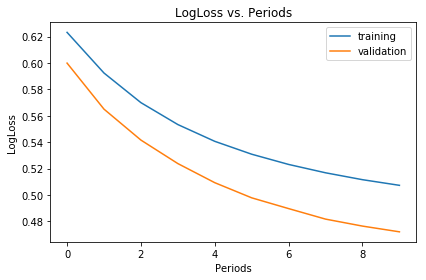

In [63]:
linear_classifier = train_linear_classifier_model(
    features_cl = construct_feature_columns_sex_class_age(),
    learning_rate = 0.00005,
    steps = 5000,
    batch_size = 70,
    training_examples = training_examples,
    training_targets = training_targets,
    validation_examples = validation_examples,
    validation_targets = validation_targets)
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)
print(evaluation_metrics)

Training model...
Logloss (on training data):
  period 00 : 0.63
  period 01 : 0.60
  period 02 : 0.58
  period 03 : 0.57
  period 04 : 0.55
  period 05 : 0.54
  period 06 : 0.54
  period 07 : 0.53
  period 08 : 0.52
  period 09 : 0.52
Model training finished.
{'auc': 0.85373795, 'average_loss': 0.48295948, 'label/mean': 0.36363637, 'recall': 0.6666667, 'global_step': 7000, 'prediction/mean': 0.39498827, 'auc_precision_recall': 0.82872736, 'accuracy_baseline': 0.6363636, 'precision': 0.75789475, 'accuracy': 0.8013468, 'loss': 0.48295948}


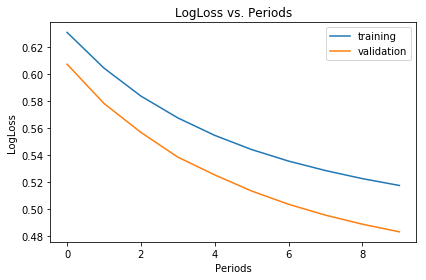

In [85]:
linear_classifier = train_linear_classifier_model(
    features_cl = construct_feature_columns_sex_class_age(),
    learning_rate = 0.00005,
    steps = 7000,
    batch_size = 40,
    training_examples = training_examples,
    training_targets = training_targets,
    validation_examples = validation_examples,
    validation_targets = validation_targets)
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)
print(evaluation_metrics)

In [33]:
def construct_feature_columns_sex_class_age_agenull():
    Sex_column = tf.feature_column.numeric_column(key="Gender")
    Pclass_column = tf.feature_column.numeric_column(key="Pclass")
    Age_column = tf.feature_column.numeric_column(key="Age")
    Age_bucketized = tf.feature_column.bucketized_column(
                        source_column=Age_column,
                        boundaries=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
                    )
    Age_null = tf.feature_column.numeric_column(key="Agenull")
    feature_columns = set([
        Sex_column,
        Pclass_column,
        Age_bucketized,
        Age_null
    ])
    return feature_columns

Training model...
Logloss (on training data):
  period 00 : 0.65
  period 01 : 0.63
  period 02 : 0.61
  period 03 : 0.60
  period 04 : 0.59
  period 05 : 0.58
  period 06 : 0.57
  period 07 : 0.56
  period 08 : 0.55
  period 09 : 0.55
Model training finished.
{'label/mean': 0.36363637, 'precision': 0.8045977, 'accuracy': 0.8148148, 'auc_precision_recall': 0.8259803, 'global_step': 5000, 'average_loss': 0.5177404, 'accuracy_baseline': 0.6363636, 'loss': 0.5177404, 'auc': 0.85082304, 'recall': 0.6481481, 'prediction/mean': 0.39109275}


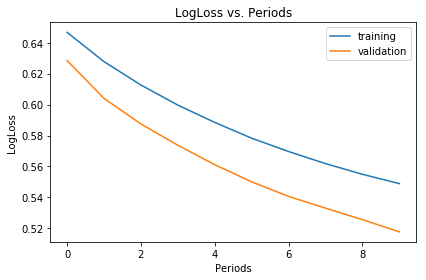

In [44]:
linear_classifier = train_linear_classifier_model(
    features_cl = construct_feature_columns_sex_class_age_agenull(),
    learning_rate = 0.00005,
    steps = 5000,
    batch_size = 30,
    training_examples = training_examples,
    training_targets = training_targets,
    validation_examples = validation_examples,
    validation_targets = validation_targets)
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)
print(evaluation_metrics)

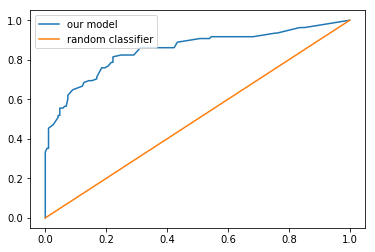

In [41]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

In [90]:
df_test = pd.read_csv('test.csv')
df_test.describe()
df_test.head(297)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
def preprocess_features(df_rand):
    df_rand['Agenull'] = np.where(df_rand.Age.isnull(), 1, 0)
    gender = {'male': 1,'female': 2} 
    Gender = [gender[item] for item in df_rand.Sex]
    selected_features = df_rand[['Pclass', 'Age','Agenull']].copy()
    selected_features['Gender'] = Gender
    processed_features = []
    processed_features = selected_features
    return processed_features

def construct_feature_columns_sex_class_age_agenull():
    Sex_column = tf.feature_column.numeric_column(key="Gender")
    Pclass_column = tf.feature_column.numeric_column(key="Pclass")
    Age_column = tf.feature_column.numeric_column(key="Age")
    Age_bucketized = tf.feature_column.bucketized_column(
                        source_column=Age_column,
                        boundaries=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
                    )
    Age_null = tf.feature_column.numeric_column(key="Agenull")
    feature_columns = set([
        Sex_column,
        Pclass_column,
        Age_bucketized,
        Age_null
    ])
    return feature_columns

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    #This is done to feed into the function an iterator function that will get the batches ready to be processed
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["Survived"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

In [115]:
def my_pred_input_fn(features, batch_size=1, shuffle=True, num_epochs=None):
    """
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    #This is done to feed into the function an iterator function that will get the batches ready to be processed
    ds = Dataset.from_tensor_slices((features)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features = ds.make_one_shot_iterator().get_next()
    return features

In [107]:
print(df_pred["Gender"])
print(validation_targets["Survived"])

0      1
1      2
2      1
3      1
4      2
5      1
6      2
7      1
8      2
9      1
10     1
11     1
12     2
13     1
14     2
15     2
16     1
17     1
18     2
19     2
20     1
21     1
22     2
23     1
24     2
25     1
26     2
27     1
28     1
29     1
      ..
388    1
389    1
390    1
391    2
392    1
393    1
394    1
395    2
396    1
397    2
398    1
399    1
400    2
401    1
402    2
403    1
404    1
405    1
406    1
407    1
408    2
409    2
410    2
411    2
412    2
413    1
414    2
415    1
416    1
417    1
Name: Gender, Length: 418, dtype: int64
838    0
670    0
33     1
38     0
463    0
845    1
501    1
874    0
827    0
108    0
538    1
227    0
484    0
684    1
138    1
518    1
83     0
629    0
47     1
208    0
291    0
159    1
651    0
548    0
308    1
471    0
862    0
888    1
243    1
606    0
      ..
17     0
767    1
201    0
530    0
232    1
450    1
798    0
734    0
722    1
697    0
682    1
441    0
482    0
393    1
372   

In [116]:
predict_test_input_fn = lambda: my_pred_input_fn(features=df_pred,
                                             num_epochs=1, 
                                             shuffle=False)

In [117]:
df_pred = preprocess_features(df_test)
print(df_pred)
print(validation_examples)
features_predict = construct_feature_columns_sex_class_age_agenull()
print(features_predict)

     Pclass   Age  Agenull  Gender
0         3  34.5        0       1
1         3  47.0        0       2
2         2  62.0        0       1
3         3  27.0        0       1
4         3  22.0        0       2
5         3  14.0        0       1
6         3  30.0        0       2
7         2  26.0        0       1
8         3  18.0        0       2
9         3  21.0        0       1
10        3   NaN        1       1
11        1  46.0        0       1
12        1  23.0        0       2
13        2  63.0        0       1
14        1  47.0        0       2
15        2  24.0        0       2
16        2  35.0        0       1
17        3  21.0        0       1
18        3  27.0        0       2
19        3  45.0        0       2
20        1  55.0        0       1
21        3   9.0        0       1
22        1   NaN        1       2
23        1  21.0        0       1
24        1  48.0        0       2
25        3  50.0        0       1
26        1  22.0        0       2
27        3  22.5   

In [122]:
df_pred = preprocess_features(df_test)
#print(df_pred)
features_predict = construct_feature_columns_sex_class_age_agenull()
#print(features_predict)
predict_test_input_fn = lambda: my_pred_input_fn(features=df_pred,
                                             num_epochs=1, 
                                             shuffle=False)
print(predict_test_input_fn)
predicted_data = linear_classifier.predict(input_fn=predict_test_input_fn)
#print(predicted_data)
#print(len(list(predicted_data)))
predicted_data = pd.DataFrame([item['probabilities'] for item in predicted_data])
print(predicted_data)

<function <lambda> at 0x7f81a2470840>
            0         1
0    0.737281  0.262719
1    0.599593  0.400407
2    0.622259  0.377741
3    0.749947  0.250053
4    0.596245  0.403755
5    0.742949  0.257051
6    0.579036  0.420964
7    0.627982  0.372018
8    0.587171  0.412829
9    0.750804  0.249196
10   0.768697  0.231303
11   0.491827  0.508173
12   0.318715  0.681285
13   0.622259  0.377741
14   0.321746  0.678254
15   0.453901  0.546099
16   0.614918  0.385082
17   0.750804  0.249196
18   0.595143  0.404857
19   0.599593  0.400407
20   0.483807  0.516193
21   0.739915  0.260085
22   0.340375  0.659625
23   0.488347  0.511653
24   0.321746  0.678254
25   0.749106  0.250895
26   0.318715  0.681285
27   0.750804  0.249196
28   0.482139  0.517861
29   0.768697  0.231303
..        ...       ...
388  0.750804  0.249196
389  0.739915  0.260085
390  0.488347  0.511653
391  0.316751  0.683249
392  0.742949  0.257051
393  0.632294  0.367706
394  0.749947  0.250053
395  0.310615  0.689385
39

In [143]:
a = predicted_data[0]
b = np.where(a > .6, 0, 1) 
b = pd.Series(b)
c = df_test[['PassengerId']]
c['Survived'] = b
c

/home/jcruzycelis/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [144]:
c.to_csv('./predictions.csv', index=False)